In [219]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../codes')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [220]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import networks
import utils
import config
import loss
import trainer
import evaluator
import plots
from scipy.stats import spearmanr

In [221]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [222]:
test_loader =  utils.create_dataloader_soil(config.test_representation, config.test_data, config.soil_data)

In [223]:
test_loader.dataset.data.shape

(12684, 1118)

In [224]:
num_geno = test_loader.dataset.data.shape[1]
model = networks.final_net(num_features = test_loader.dataset.data.shape[1], hidden_dim=350)
model.load_state_dict(torch.load(config.soil_model_path))

<All keys matched successfully>

In [225]:
criterion = nn.MSELoss()

In [226]:
test_loss, true, predicted = evaluator.evaluate_step_by_avg(test_loader, model, criterion)

In [227]:
pcc = loss.calculate_perf_measure(true, predicted)
spearman, pval = spearmanr(true, predicted)
print('pcc: ', pcc)
print('spearman: ', spearman)

pcc:  0.7614842236559987
spearman:  0.7487562351893321


In [228]:
len(predicted)

12684

In [229]:
df = pd.DataFrame({
    'Loc_no': test_loader.dataset.locations,
    'trial': test_loader.dataset.trials,
    'Value': test_loader.dataset.target,
    'predicted': predicted
})

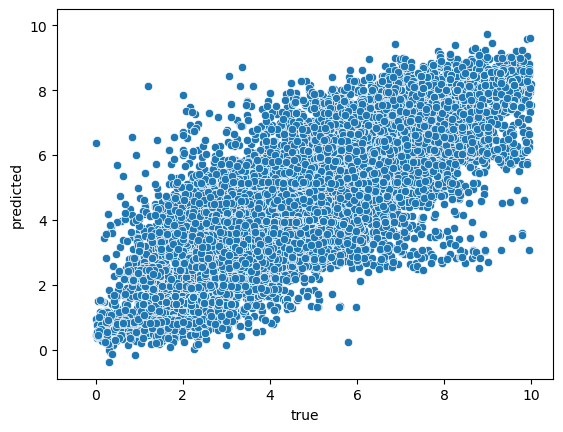

In [230]:
plots.plot_scatter(true, predicted, 'true', 'predicted')

In [231]:
result_df = loss.get_res_by_location(df)

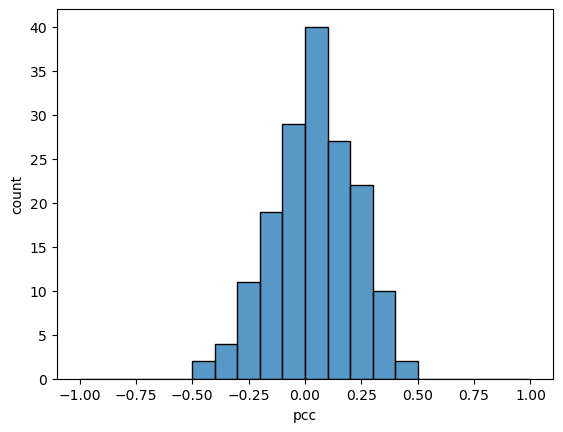

In [232]:
plots.plot_histogram(result_df['pcc'].to_numpy(), xlabel='pcc', ylabel='count')

In [233]:
np.sum((result_df['pcc'] > 0) & (result_df['pcc'] <= 0.3))

89

In [234]:
np.sum(result_df['pcc'] > 0.3)

12

In [235]:
np.sum(result_df['pcc'] < 0)

65

In [236]:
test_loader =  utils.create_dataloader_soil(config.test_representation_unique_env, config.test_unique_env_data, config.soil_data)

In [237]:
test_loss, true, predicted = evaluator.evaluate_step_by_avg(test_loader, model, criterion)

In [238]:
pcc = loss.calculate_perf_measure(true, predicted)
spearman, pval = spearmanr(true, predicted)
print('pcc: ', pcc)
print('spearman: ', spearman)

pcc:  0.48098432594516716
spearman:  0.4571631813050148
